<h1> 21K-3103 ANN Assignment 8

<h2>Task 1 (CIFAR-10 CNN):

In [7]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras import Sequential
from keras import layers, metrics, optimizers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ultralytics import YOLO
from tensorflow import keras
import PIL
import os
import cv2

In [2]:
#Loading it directly from Keras datasets
cifar_df = keras.datasets.cifar10

In [3]:
#Now, we'll split it into training and testing
(train_images, train_labels), (test_images, test_labels) = cifar_df.load_data()

In [4]:
#Making a list of class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images, test_images = train_images / 255, test_images / 255

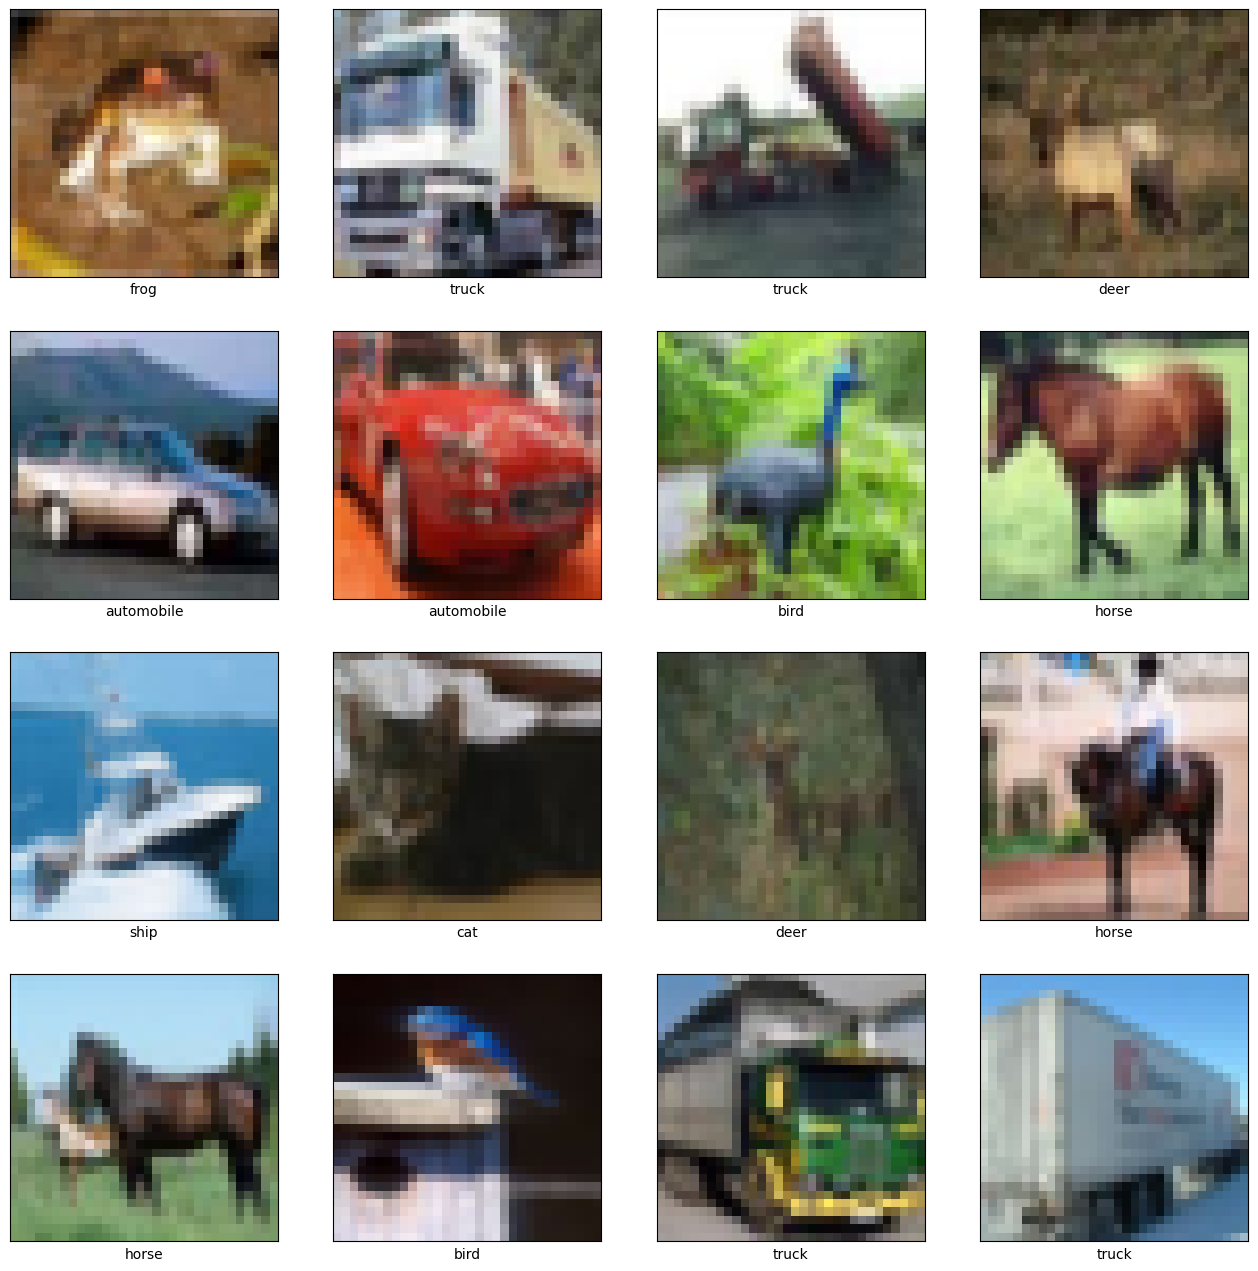

In [5]:
def plot_image():
    plt.figure(figsize=(16, 16))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(train_images[i], cmap="binary")
        plt.xlabel(labels[train_labels[i][0]])
        plt.grid(False)
    plt.show()

plot_image()

In [6]:
print("Input_dim =",train_images.shape)
#Already flattened, best (need to reduce image to 1D array)

#50k images, width and height 32x32, 3 channels

Input_dim = (50000, 32, 32, 3)


In [7]:
#Defining our model
cifar_model = Sequential()

#The mode I'm gonna make is conv1 + pool1 + conv2 + pool2
#Adding conv1 (64 filters, each of 4x4 size with stride = 1)
cifar_model.add(layers.Conv2D(64, (4, 4), (1, 1), padding = "valid", activation = "relu", input_shape = (32, 32, 3)))
#Adding pool1 (gonna use max pooling)
cifar_model.add(layers.MaxPool2D(pool_size=(2, 2)))

#Adding conv2 (input_dim removed because this is not an input layer)
cifar_model.add(layers.Conv2D(128, (4, 4), (1, 1), padding = "valid", activation = "relu"))
#Adding pool2 (gonna use max pooling)
cifar_model.add(layers.MaxPool2D(pool_size=(2, 2)))

#Now we'll flatten and add fully-connected layer
cifar_model.add(layers.Flatten())
cifar_model.add(layers.Dense(units = 512, activation = 'relu'))

#10 classes, so units = 10 (this one is the output layer)
cifar_model.add(layers.Dense(units = 10, activation= 'softmax'))

cifar_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

#Fitting the training data into the model
cifar_model.fit(train_images, train_labels, batch_size = 512, epochs = 100, steps_per_epoch= 40)





Epoch 1/100


40/40 [==============================] - 28s 612ms/step - loss: 2.0030 - accuracy: 0.2680
Epoch 2/100
40/40 [==============================] - 22s 556ms/step - loss: 1.7147 - accuracy: 0.3780
Epoch 3/100
40/40 [==============================] - 22s 539ms/step - loss: 1.5786 - accuracy: 0.4310
Epoch 4/100
40/40 [==============================] - 22s 544ms/step - loss: 1.5108 - accuracy: 0.4557
Epoch 5/100
40/40 [==============================] - 22s 545ms/step - loss: 1.4513 - accuracy: 0.4786
Epoch 6/100
40/40 [==============================] - 22s 544ms/step - loss: 1.4274 - accuracy: 0.4940
Epoch 7/100
40/40 [==============================] - 21s 535ms/step - loss: 1.3746 - accuracy: 0.5103
Epoch 8/100
40/40 [==============================] - 21s 534ms/step - loss: 1.3357 - accuracy: 0.5276
Epoch 9/100
40/40 [==============================] - 21s 534ms/step - loss: 1.2924 - accuracy: 0.5462
Epoch 10/100
40/40 [==============================] - 22s 548ms/step - loss: 1

In [8]:
cifar_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

1/1 [==============================] - 1s 892ms/step


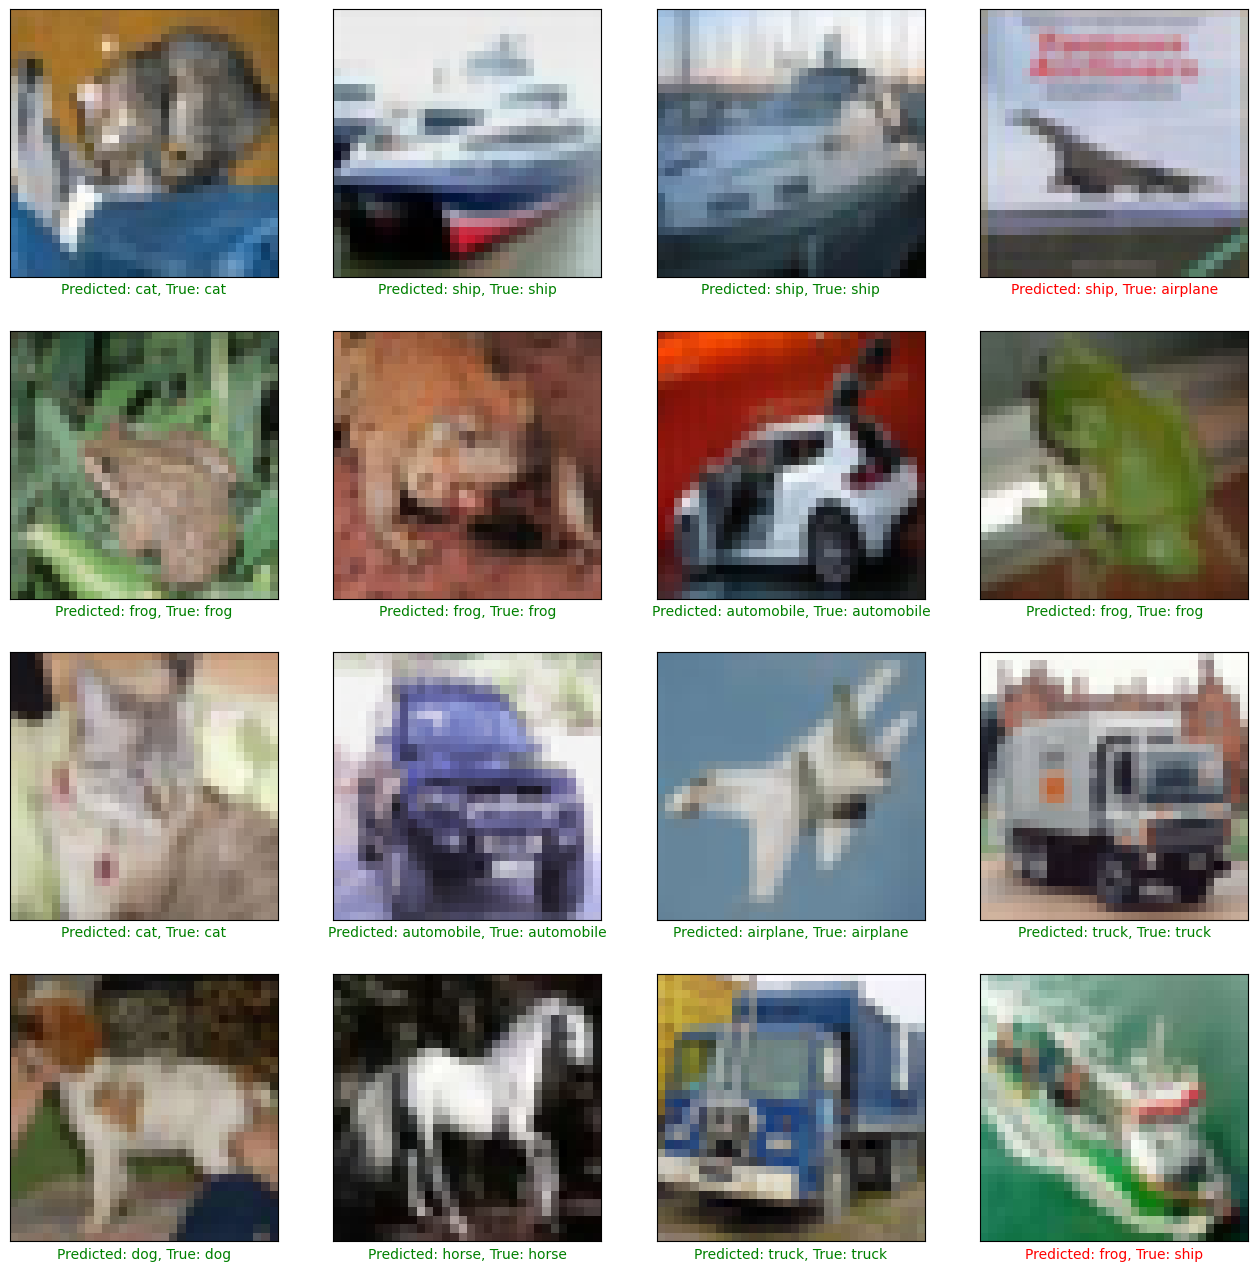

In [9]:
#Now, evaluate the model
cifar_model.evaluate(test_images, test_labels)

# Predict the first 16 images
predictions = cifar_model.predict(test_images[:16])

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 16 images along with their predicted and true labels
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.squeeze(test_labels[i]) #Had to use squeeze function otherwise, it wont show actual labels
    #Error occured because it wasn't 1D
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {labels[predicted_label]}, True: {labels[true_label]}", color=color)
plt.show()

In [10]:
#Saving the model
cifar_model.save("task1.keras")

c:\Users\CZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h2>Task 2 (FER-2013 CNN):

this time, we're working on actual images, rather than presented in a dataFrame

In [2]:
# allows your model to receive new variations of the images at each epoch. 
#But do remember that it only returns the transformed images and 
#does not add it to the set of images that you have
train = ImageDataGenerator(rescale = 1/255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

test = ImageDataGenerator( rescale = 1/255)

In [3]:
#using flow_from_directory to directly import images, and have them classified conveniently :)
#With this we also don't need separate data labels, as the folder names are exactly that

#IF USING COLAB
#from google.colab import drive
# drive.mount('/content/drive')
# drive_path = 'drive/My Drive/ANN Assignment 8'
# training_data = train.flow_from_directory(drive_path+"/FER-2013/train",target_size=(200, 200), batch_size = 100, class_mode="categorical")
# test_data = test.flow_from_directory(drive_path+"/FER-2013/test",target_size=(200, 200), batch_size = 100, class_mode="categorical")

training_data = train.flow_from_directory("FER-2013/train/",target_size=(200, 200), batch_size = 100, class_mode="categorical")
test_data = test.flow_from_directory("FER-2013/test/",target_size=(200, 200), batch_size = 100, class_mode="categorical")


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Checking the classes
print(training_data.class_indices)
fer_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [4]:
#Training the model
fer_model = Sequential()
#Input shape was specified as target_size in the flow_from_directory() call

#Structure: conv1, pool1, conv2, pool2, conv3, pool3
fer_model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), strides= (1, 1), padding= "valid", activation = 'relu', input_shape = (200, 200, 3)))
fer_model.add(layers.MaxPool2D(pool_size=(2, 2)))

fer_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
fer_model.add(layers.MaxPool2D(pool_size=(2, 2)))

fer_model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
fer_model.add(layers.MaxPool2D(pool_size=(2, 2)))

#Now, flattening and adding in the fully connected layer
fer_model.add(layers.Flatten())
fer_model.add(layers.Dense(units = 256, activation = "relu"))

#Now, finishing with the output layer (7 units cause 7 classes)
fer_model.add(layers.Dense(units = 7, activation= 'softmax'))

c:\Users\Fahad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#now compiling the model
fer_model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

fer_model.fit(training_data, steps_per_epoch=20, epochs=100, validation_data=test_data)

Epoch 1/100


c:\Users\Fahad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 202s 10s/step - accuracy: 0.1773 - loss: 2.5159 - val_accuracy: 0.2471 - val_loss: 1.8293
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.2240 - loss: 1.8330 - val_accuracy: 0.2488 - val_loss: 1.8099
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 220s 11s/step - accuracy: 0.2544 - loss: 1.8062 - val_accuracy: 0.2469 - val_loss: 1.7919
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.2590 - loss: 1.7655 - val_accuracy: 0.3200 - val_loss: 1.7242
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.3152 - loss: 1.7128 - val_accuracy: 0.3468 - val_loss: 1.6702
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.3417 - loss: 1.6512 - val_accuracy: 0.3642 - val_loss: 1.6460
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.3618 - loss: 1.6285 - val_accuracy: 0.3576 - val_loss: 1.6351
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.3668 - loss: 1.6705 - val_accuracy: 0.3668 - val_

c:\Users\Fahad\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.4076 - loss: 1.5005 - val_accuracy: 0.4149 - val_loss: 1.5293
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.4398 - loss: 1.4584 - val_accuracy: 0.4147 - val_loss: 1.5228
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4262 - loss: 1.4802 - val_accuracy: 0.4160 - val_loss: 1.4995
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4356 - loss: 1.4633 - val_accuracy: 0.4114 - val_loss: 1.4946
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.4285 - loss: 1.4444 - val_accuracy: 0.4296 - val_loss: 1.4821
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.4444 - loss: 1.3978 - val_accuracy: 0.4341 - val_loss: 1.4547
Epoch 21/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.4666 - loss: 1.3594 - val_accuracy: 0.4232 - val_loss: 1.4981
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.4643 - loss: 1.4331 - val_accuracy: 0.4393 - val_l

In [6]:
fer_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    17,334,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,288,727 (199.47 MB)

 Trainable params: 17,429,575 (66.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,859,152 (132.98 MB)

In [21]:
#Testing with images
from PIL import Image

# Load the image using PIL
test_image = Image.open('task3-test.png')

# Preprocess the image
test_image = test_image.resize((200, 200))  # Resize
img_array = np.array(test_image)
img_array = np.expand_dims(img_array, axis=-1)  # Add a new dimension for channels
img_array = np.repeat(img_array, 3, axis=-1)  # Duplicate grayscale channel to create RGB
img_array = img_array / 255.0  # Normalize (assuming 0-1 range)
test_predict = fer_model.predict(img_array)

plt.imshow(test_image, test_predict)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 200, 3), dtype=float32). Expected shape (None, 200, 200, 3), but input has incompatible shape (32, 200, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 200, 3), dtype=float32)
  • training=False
  • mask=None

In [7]:
#Saving the model
fer_model.save("task2.keras")

<h2>Task 3 (Objection detection via YOLO):

In [2]:
#We're gonna use pre-trained model from YOLO, and throw in our own custom dataset
yolo_model = YOLO('yolov8n.pt')

In [4]:
results = yolo_model.train(data = 'data.yaml', epochs = 50, imgsz = 256)

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45  Python-3.11.6 torch-2.2.1+cpu CPU (AMD PRO A10-8770 R7, 10 COMPUTE CORES 4C+6G)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning G:\6th semester\Artificial Neural Networks\Assignments\Assignment 8\pills V2\train\labels.cache... 316 images, 0 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<?, ?it/s]
val: Scanning G:\6th semester\Artificial Neural Networks\Assignments\Assignment 8\pills V2\valid\labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

Plotting labels to runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.9688      3.855     0.9578         25        256: 100%|██████████| 20/20 [01:42<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  7.00s/it]

                   all         90         98     0.0028      0.679      0.127     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.8556      2.633      0.913         30        256: 100%|██████████| 20/20 [01:31<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.18s/it]

                   all         90         98          1     0.0123      0.374      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8483      1.875     0.9155         30        256: 100%|██████████| 20/20 [01:30<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

                   all         90         98       0.72      0.169      0.548      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8354      1.582     0.9253         20        256: 100%|██████████| 20/20 [01:32<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.24s/it]

                   all         90         98      0.697      0.529      0.652      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.8911      1.498     0.9347         20        256: 100%|██████████| 20/20 [01:28<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.73s/it]

                   all         90         98      0.716      0.592      0.703      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.8184      1.302     0.9152         16        256: 100%|██████████| 20/20 [01:50<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.14s/it]

                   all         90         98      0.776      0.736      0.746      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8186       1.19     0.9292         29        256: 100%|██████████| 20/20 [01:32<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.15s/it]

                   all         90         98      0.818      0.767      0.803      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7883      1.158     0.9364         26        256: 100%|██████████| 20/20 [01:30<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.13s/it]

                   all         90         98      0.879      0.703       0.79      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.7672      1.065     0.9226         17        256: 100%|██████████| 20/20 [01:33<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.28s/it]

                   all         90         98      0.787      0.712      0.785      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.7595      1.087      0.916         27        256: 100%|██████████| 20/20 [01:31<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.21s/it]

                   all         90         98      0.833      0.806      0.791      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.7314     0.9765     0.9098         19        256: 100%|██████████| 20/20 [01:34<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.13s/it]

                   all         90         98      0.947      0.719      0.794      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7455      1.005      0.896         19        256: 100%|██████████| 20/20 [01:29<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.23s/it]

                   all         90         98      0.819      0.781      0.935      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.7089     0.9452     0.9122         18        256: 100%|██████████| 20/20 [01:28<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.15s/it]

                   all         90         98      0.872      0.782      0.825      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.7169      0.941     0.9141         20        256: 100%|██████████| 20/20 [01:33<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

                   all         90         98      0.812      0.779      0.783      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.6886     0.8765     0.9076         29        256: 100%|██████████| 20/20 [01:29<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.19s/it]

                   all         90         98      0.859       0.84      0.831      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.6806     0.8517     0.9108         23        256: 100%|██████████| 20/20 [01:32<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.22s/it]

                   all         90         98      0.864      0.834      0.893      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.6903     0.8906      0.897         22        256: 100%|██████████| 20/20 [01:29<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.16s/it]

                   all         90         98      0.887      0.794      0.877      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.6813     0.8744     0.9148         28        256: 100%|██████████| 20/20 [01:27<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.18s/it]

                   all         90         98      0.877      0.821      0.935      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6624     0.8123     0.8962         23        256: 100%|██████████| 20/20 [01:29<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.21s/it]

                   all         90         98      0.909      0.769      0.942      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.6746     0.8251     0.9033         20        256: 100%|██████████| 20/20 [01:30<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.16s/it]

                   all         90         98      0.896      0.804      0.922      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.6578     0.7754      0.898         26        256: 100%|██████████| 20/20 [01:31<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.13s/it]

                   all         90         98      0.898      0.798      0.924      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.6575     0.8062     0.8953         20        256: 100%|██████████| 20/20 [01:28<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.19s/it]

                   all         90         98      0.868      0.836      0.928      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.6605      0.788     0.9063         28        256: 100%|██████████| 20/20 [01:31<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.11s/it]

                   all         90         98      0.929       0.79      0.937      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6493     0.7374     0.8966         30        256: 100%|██████████| 20/20 [01:29<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.12s/it]

                   all         90         98      0.906      0.789      0.947      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.6322     0.6959     0.8968         17        256: 100%|██████████| 20/20 [01:30<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.03s/it]

                   all         90         98      0.953      0.792      0.957      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.6606     0.7678     0.9042         24        256: 100%|██████████| 20/20 [01:25<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.97s/it]

                   all         90         98      0.961      0.787      0.961      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.6421     0.7115     0.8676         20        256: 100%|██████████| 20/20 [01:28<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.20s/it]

                   all         90         98      0.948      0.803      0.953      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6155     0.6852     0.8794         27        256: 100%|██████████| 20/20 [01:31<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.14s/it]

                   all         90         98      0.952      0.789      0.969      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.5741     0.6521     0.8744         17        256: 100%|██████████| 20/20 [01:31<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.15s/it]

                   all         90         98        0.9      0.795      0.952      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5867      0.623     0.8713         12        256: 100%|██████████| 20/20 [01:31<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.16s/it]

                   all         90         98      0.914      0.822      0.958      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.5947     0.6707     0.8718         25        256: 100%|██████████| 20/20 [01:29<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

                   all         90         98      0.841      0.973      0.963      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.5827     0.6773     0.8838         26        256: 100%|██████████| 20/20 [01:30<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.18s/it]

                   all         90         98      0.815      0.973      0.948      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.5963     0.6353      0.875         20        256: 100%|██████████| 20/20 [01:31<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.97s/it]

                   all         90         98      0.827      0.973      0.967      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6054     0.6577     0.8881         19        256: 100%|██████████| 20/20 [01:26<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.92s/it]

                   all         90         98      0.957      0.796      0.965       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5819     0.6285     0.8754         28        256: 100%|██████████| 20/20 [01:27<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.04s/it]

                   all         90         98      0.937      0.818      0.897      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5476     0.6163     0.8812         20        256: 100%|██████████| 20/20 [01:27<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.19s/it]

                   all         90         98      0.951      0.828      0.903      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      0.566     0.6048     0.8677         19        256: 100%|██████████| 20/20 [01:29<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.18s/it]

                   all         90         98      0.933      0.822      0.902      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5204     0.5827     0.8758         26        256: 100%|██████████| 20/20 [01:30<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.22s/it]

                   all         90         98      0.958      0.787       0.96      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5439     0.5976     0.8798         21        256: 100%|██████████| 20/20 [01:31<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.20s/it]

                   all         90         98       0.93       0.79      0.944      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5466     0.5907     0.8768         19        256: 100%|██████████| 20/20 [01:29<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.10s/it]

                   all         90         98      0.913      0.826      0.948      0.843


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4483     0.5263     0.8028         12        256: 100%|██████████| 20/20 [01:31<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

                   all         90         98      0.931      0.819      0.956      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4381     0.5242      0.808         12        256: 100%|██████████| 20/20 [01:29<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.29s/it]

                   all         90         98      0.832      0.973      0.958       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4294     0.5115     0.8156         13        256: 100%|██████████| 20/20 [01:28<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.24s/it]

                   all         90         98      0.846      0.973      0.972      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4149     0.4796     0.8055         14        256: 100%|██████████| 20/20 [01:31<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.08s/it]

                   all         90         98      0.975      0.822       0.97       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4085     0.4812     0.7979         12        256: 100%|██████████| 20/20 [01:30<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.22s/it]

                   all         90         98      0.981      0.813      0.911      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4121     0.4826     0.8114         14        256: 100%|██████████| 20/20 [01:36<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.26s/it]

                   all         90         98      0.978      0.798       0.91      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      0.406     0.4628     0.7902         18        256: 100%|██████████| 20/20 [01:32<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.34s/it]

                   all         90         98      0.967      0.797       0.91      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.3942      0.455      0.795         16        256: 100%|██████████| 20/20 [01:35<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

                   all         90         98      0.967        0.8      0.911      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.397     0.4549     0.7942         14        256: 100%|██████████| 20/20 [01:33<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.46s/it]

                   all         90         98      0.979      0.809      0.912      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.3943     0.4474     0.7983         12        256: 100%|██████████| 20/20 [01:28<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.04s/it]

                   all         90         98      0.965        0.8      0.911      0.816



50 epochs completed in 1.538 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.11.6 torch-2.2.1+cpu CPU (AMD PRO A10-8770 R7, 10 COMPUTE CORES 4C+6G)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.75s/it]


                   all         90         98      0.845      0.973      0.972      0.875
             Cipro 500         90         26      0.893      0.885      0.915      0.855
        Ibuphil 600 mg         90          1      0.948          1      0.995      0.895
   Ibuphil Cold 400-60         90         10      0.839          1      0.986      0.908
            Xyzall 5mg         90         10      0.602          1      0.948       0.78
                  blue         90         11      0.922          1      0.995      0.898
                  pink         90         15      0.878          1      0.995      0.926
                   red         90         15      0.941          1      0.995        0.9
                 white         90         10       0.74        0.9      0.948       0.84
Speed: 1.3ms preprocess, 56.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train3


In [5]:
#Model saved in train3, so loading that
yolo_model_2 = YOLO('runs/detect/train3/weights/best.pt')

#Testing on an image from the test dataset
yolo_model_2.predict('pills V2/test/images/20210702_170402_jpg.rf.d94405cdafbfed495cb031edf08c35ce.jpg', save = True, imgsz = 256, conf = 0.25)


image 1/1 g:\6th semester\Artificial Neural Networks\Assignments\Assignment 8\pills V2\test\images\20210702_170402_jpg.rf.d94405cdafbfed495cb031edf08c35ce.jpg: 256x256 1 pink, 224.7ms
Speed: 8.2ms preprocess, 224.7ms inference, 10.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Cipro 500', 1: 'Ibuphil 600 mg', 2: 'Ibuphil Cold 400-60', 3: 'Xyzall 5mg', 4: 'blue', 5: 'pink', 6: 'red', 7: 'white'}
 obb: None
 orig_img: array([[[145, 149, 160],
         [145, 149, 160],
         [144, 148, 159],
         ...,
         [ 86, 105, 126],
         [ 86, 105, 126],
         [ 86, 105, 126]],
 
        [[145, 149, 160],
         [145, 149, 160],
         [145, 149, 160],
         ...,
         [ 86, 105, 126],
         [ 86, 105, 126],
         [ 86, 105, 126]],
 
        [[146, 150, 161],
         [146, 150, 161],
         [145, 149, 160],
         ...,
         [ 86, 105, 126],
         [ 86, 105, 126],
         [ 86, 105, 126]],
 
        ...,
 
        [[ 80, 104, 128],
         [ 80, 104, 128],
         [ 80, 104, 128],
         ...,
         [  0,   1,   1],
         [  0,   1,   1],
         [  0,   1,   1]],
 

In [15]:
#Showing the predicted image
yolo_result = plt.imread('runs/detect/predict/20210702_170402_jpg.rf.d94405cdafbfed495cb031edf08c35ce.jpg')
plt.imshow(yolo_result)
plt.show()

<Figure size 640x480 with 1 Axes>

<h2>Task 4 (Image Segmentation):

In [8]:
## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()
        
    def __load__(self, id_name):
        ## Path
        image_path = os.path.join(self.path, id_name, "images", id_name) + ".png"
        mask_path = os.path.join(self.path, id_name, "masks/")
        all_masks = os.listdir(mask_path)
        
        ## Reading Image
        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        mask = np.zeros((self.image_size, self.image_size, 1))
        
        ## Reading Masks
        for name in all_masks:
            _mask_path = mask_path + name
            _mask_image = cv2.imread(_mask_path, -1)
            _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size)) #128x128
            _mask_image = np.expand_dims(_mask_image, axis=-1)
            mask = np.maximum(mask, _mask_image)
            
        ## Normalizaing 
        image = image/255.0
        mask = mask/255.0
        
        return image, mask
    
    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))


Due to immensely slow internet speeds, I couldn't download the dataset and test my implementation. I've only written code for it.

In [11]:
image_size = 128
train_path = 'ADE20K/training/ann/'
epochs = 10
batch_size = 10

## Training Ids
train_ids = next(os.walk(train_path))[1]

## Validation Data Size
val_data_size = 10

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

In [12]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(0,) (0,)


In [4]:
def uNet(input_shape):
  inputs = keras.layers.Input(shape=input_shape)

  # Encoder path
  conv1 = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv1)
  pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(pool1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv2)
  pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

  conv3 = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv3)
  pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

  # Bottleneck
  conv4 = keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same")(pool3)
  conv4 = keras.layers.BatchNormalization()(conv4)
  conv4 = keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv4)

  # Decoder path
  up5 = keras.layers.Concatenate()([keras.layers.UpSampling2D(size=(2, 2))(conv4), conv3])
  conv5 = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(up5)
  conv5 = keras.layers.BatchNormalization()(conv5)
  conv5 = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv5)

  up6 = keras.layers.Concatenate()([keras.layers.UpSampling2D(size=(2, 2))(conv5), conv2])
  conv6 = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(up6)
  conv6 = keras.layers.BatchNormalization()(conv6)
  conv6 = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv6)

  up7 = keras.layers.Concatenate()([keras.layers.UpSampling2D(size=(2, 2))(conv6), conv1])
  conv7 = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(up7)
  conv7 = keras.layers.BatchNormalization()(conv7)
  conv7 = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv7)

  outputs = keras.layers.Conv2D(1, (1, 1), activation="sigmoid")(conv7)

  model = keras.models.Model(inputs=inputs, outputs=outputs)
  return model

In [5]:
def dice_coef(y_true, y_pred, smooth):
    y_true_f = keras.backend.flatten(y_true)
    y_pred_f = keras.backend.flatten(y_pred)
    intersection = keras.backend.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (keras.backend.sum(y_true_f) + keras.backend.sum(y_pred_f) + smooth)
    return dice


def dice_coef_loss(y_true, y_pred, smooth):
    return 1 - dice_coef(y_true, y_pred, smooth)

In [6]:
# Compile the model
model = uNet(input_shape=(256, 256, 3))
model.compile(optimizer="adam", loss=dice_coef_loss, metrics=["accuracy"])

In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_7[0][0]  

 Total params: 1,949,697 (7.44 MB)

 Trainable params: 1,948,289 (7.43 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [10]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps,
                    validation_steps=valid_steps, epochs=epochs)

ValueError: Must provide at least one structure

<h2>Task 5 (Style Transfer):

In [18]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


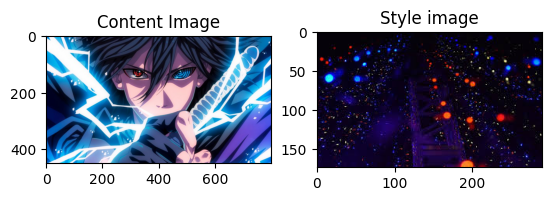

In [2]:
content_image = plt.imread('content_image.jpg')
style_image = plt.imread('style_image.jpg')


plt.subplot(1, 2, 1)
plt.title("Content Image")
plt.imshow(content_image)


plt.subplot(1, 2, 2)
plt.title("Style Image")
plt.imshow(style_image)

In [3]:
content_image = np.expand_dims(content_image, axis=0)  # Add batch dimension.. was getting shape error
style_image = np.expand_dims(style_image, axis=0)  # Add batch dimension.. was getting shape error

x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [4]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]


[('umbrella', 0.11053305),
 ('pencil_box', 0.10093398),
 ('packet', 0.0631973),
 ('rubber_eraser', 0.061964728),
 ('confectionery', 0.043963846)]

In [5]:
#Printing layer names
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)



input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [6]:
#Choose intermediate layers from the network to represent the style and content of the image
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)


In [7]:
  #Creates a VGG model that returns a list of intermediate output values.
def vgg_layers(layer_names):
    # Load our model. Load pretrained VGG, trained on ImageNet data
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [8]:
#Now, we're gonna create the model
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()


block1_conv1
  shape:  (1, 174, 290, 64)
  min:  0.0
  max:  845.6136
  mean:  55.049553

block2_conv1
  shape:  (1, 87, 145, 128)
  min:  0.0
  max:  6114.6865
  mean:  327.46472

block3_conv1
  shape:  (1, 43, 72, 256)
  min:  0.0
  max:  15391.227
  mean:  366.72113

block4_conv1
  shape:  (1, 21, 36, 512)
  min:  0.0
  max:  24545.559
  mean:  1119.2975

block5_conv1
  shape:  (1, 10, 18, 512)
  min:  0.0
  max:  3065.869
  mean:  44.696106



In [9]:
#Style matrix calculation (reffered from TensorFlow's official Web)
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)


In [10]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    #inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}


In [11]:
#Now getting the style of the style layers and the content of content layers
extractor = StyleContentModel(style_layers, content_layers)
content_image = tf.cast(content_image, dtype=tf.uint8)  # Cast to uint8 because error else-wise
results = extractor(content_image)

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0
    max:  232947.97
    mean:  1292.6283

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  610437.44
    mean:  38411.883

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  6466566.5
    mean:  73152.19

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  40428310.0
    mean:  871486.9

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  369894.5
    mean:  4365.3774

Contents:
   block5_conv2
    shape:  (1, 28, 50, 512)
    min:  0.0
    max:  1570.4321
    mean:  25.710234


In [12]:
#Setting style and content target values
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']


In [20]:
#Define a tf.Variable to contain the image to optimize
image = tf.Variable(content_image)


In [14]:
#Clipping the image (basically normalizing to between 0 and 1)
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)



In [16]:
#now the loss function:
style_weight=1e-2
content_weight=1e4

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [17]:
#Now, tp update the image
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)


@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))


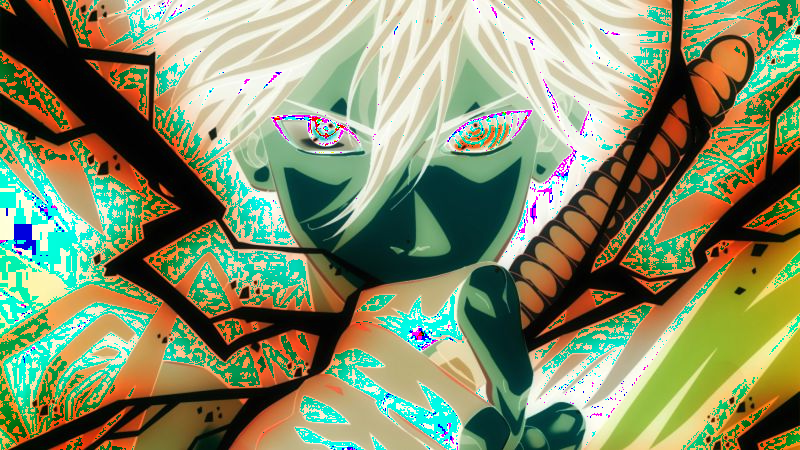

In [21]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)


In [23]:
epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  print("Train step: {}".format(step))


....................................................................................................Train step: 100
....................................................................................................Train step: 200
....................................................................................................Train step: 300
....................................................................................................Train step: 400
....................................................................................................Train step: 500
....................................................................................................Train step: 600
....................................................................................................Train step: 700
....................................................................................................Train step: 800
........................................................................

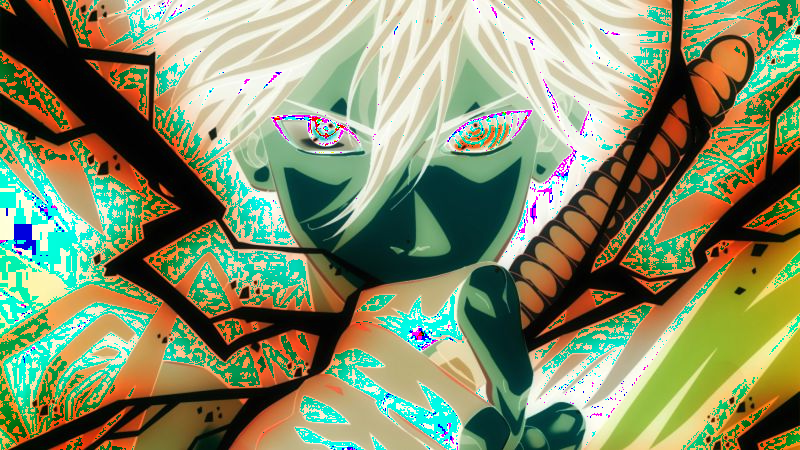

In [24]:
tensor_to_image(image)

In [25]:
file_name = 'stylized-image_k213103.png'
tensor_to_image(image).save(file_name)


In [5]:

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
tf.test.is_gpu_available()

[]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7181345461580620207
xla_global_id: -1
]
Num GPUs Available:  0


In [4]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce GTX 1660 SUPER
